In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# load pickle file

data = pickle.load(open("data_11092023.pickle", "rb"))

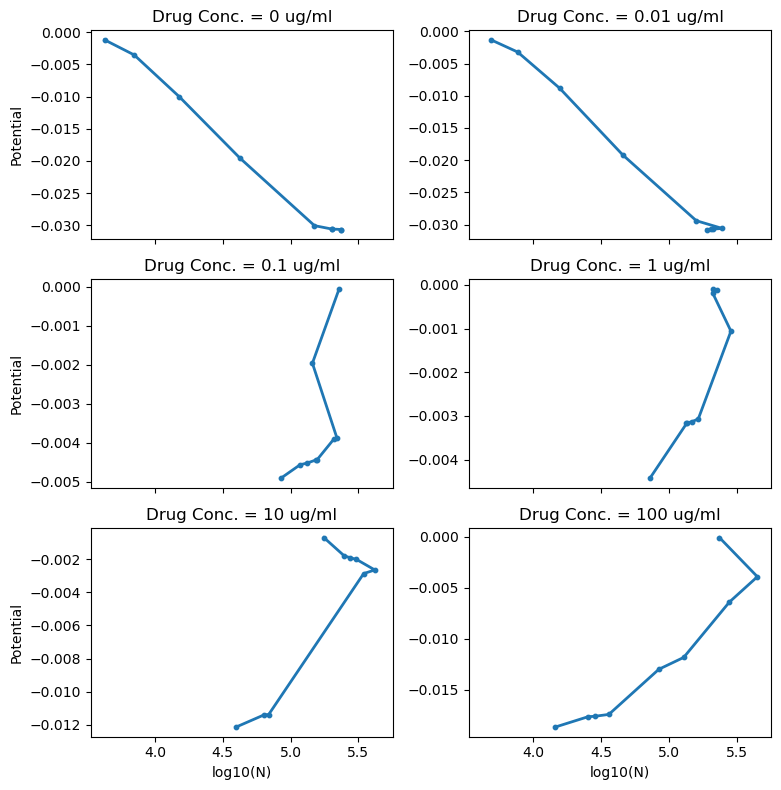

In [29]:
fig,ax_list = plt.subplots(ncols=2,nrows=3,figsize=(8,8),sharex=True)

ax_list = ax_list.flatten()

time = data['time']
indx = 0

for key in data['cell_count_mean'].keys():

    ax = ax_list[indx]

    N = np.log10(data['cell_count_mean'][key])

    # N = N/np.max(N)
    
    # compute the derivative with respect to time

    dNdt = (N[1:] - N[:-1]) / (time[1:] - time[:-1])

    # integrate -dn/dt over N

    u = []
    integral = 0

    for i in range(len(N) - 1):
        integral += -dNdt[i] * (N[i + 1] - N[i])
        u.append(integral)

    ax.plot(N[1:],u,linewidth=2)

    ax.scatter(N[1:],u,s=10)

    ax.set_title('Drug Conc. = ' + str(key) + ' ug/ml')

    indx += 1


ax_list[0].set_ylabel('Potential')

ax_list[2].set_ylabel('Potential')

ax_list[4].set_ylabel('Potential')

ax_list[4].set_xlabel('log10(N)')
ax_list[5].set_xlabel('log10(N)')

fig.tight_layout()


In [16]:
N

array([219868.20127422, 236091.24485999, 450257.43664066, 280182.44052584,
       128688.54989344,  84374.47791693,  36055.27554714,  28451.78989549,
        25360.09967573,  14359.31886749])